In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from prettytable import PrettyTable

In [96]:
df = pd.read_csv('beans_Tarea7.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [97]:
scaler = StandardScaler()

X = df.drop('Class', axis=1)
y = df['Class']

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=254, stratify=y
)

## Decision Tree

In [98]:
arbol = DecisionTreeClassifier(
    max_depth=7,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=254
)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)

importancias_arbol = pd.Series(arbol.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top5_arbol = importancias_arbol.head(5)

print('Top 5 características (Decision Tree):')
pt_dt = PrettyTable()
pt_dt.field_names = ['Feature', 'Importance']
for feat, imp in top5_arbol.items():
    pt_dt.add_row([feat, f'{imp:.4f}'])
pt_dt

Top 5 características (Decision Tree):


Feature,Importance
ShapeFactor3,0.2209
ShapeFactor1,0.2103
MajorAxisLength,0.2024
Perimeter,0.1838
MinorAxisLength,0.0707


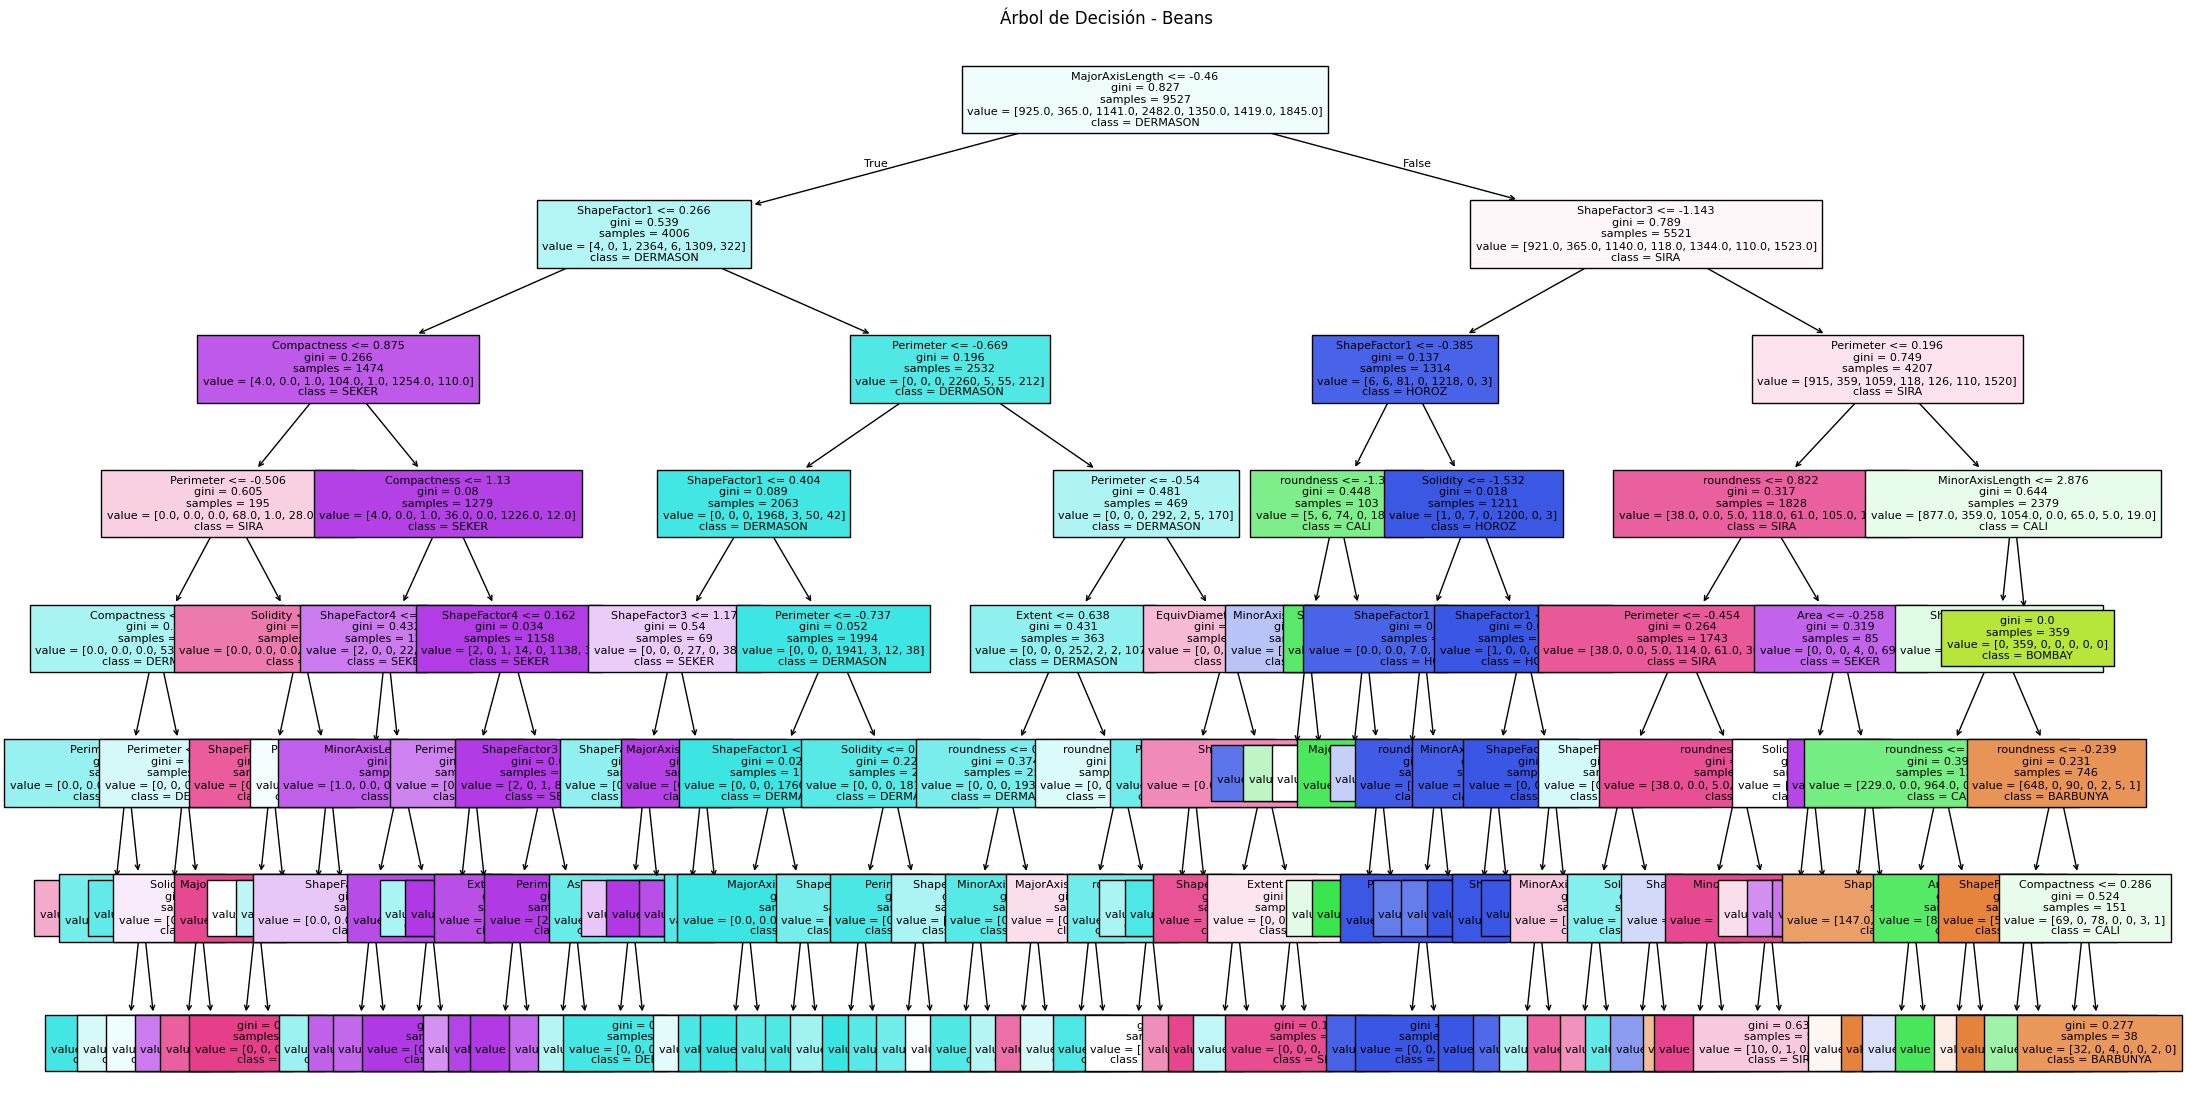

In [41]:
plt.figure(figsize=(26,14))
plot_tree(
    arbol,
    feature_names=X_train.columns,
    class_names=sorted(y.unique()),
    filled=True,
    fontsize=8
)
plt.title('Árbol de Decisión - Beans')
plt.show()

In [42]:
print(classification_report(y_test, y_pred_arbol))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.82      0.87       397
      BOMBAY       0.99      0.97      0.98       157
        CALI       0.88      0.90      0.89       489
    DERMASON       0.87      0.93      0.90      1064
       HOROZ       0.91      0.93      0.92       578
       SEKER       0.95      0.92      0.93       608
        SIRA       0.86      0.81      0.83       791

    accuracy                           0.89      4084
   macro avg       0.91      0.90      0.90      4084
weighted avg       0.89      0.89      0.89      4084



## Random Forest

In [ ]:
forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=254
)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

importancias_forest = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top5_forest = importancias_forest.head(5)

print('Top 5 características (Random Forest):')
pt_rf = PrettyTable()
pt_rf.field_names = ['Feature', 'Importance']
for feat, imp in top5_forest.items():
    pt_rf.add_row([feat, f'{imp:.4f}'])
pt_rf

Top 5 características (Random Forest):


Feature,Importance
Compactness,0.1300
ShapeFactor1,0.1013
MinorAxisLength,0.0977
ShapeFactor3,0.0915
Perimeter,0.0891


In [44]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.83      0.86       397
      BOMBAY       1.00      0.99      1.00       157
        CALI       0.89      0.88      0.88       489
    DERMASON       0.90      0.94      0.92      1064
       HOROZ       0.96      0.92      0.94       578
       SEKER       0.96      0.94      0.95       608
        SIRA       0.84      0.85      0.85       791

    accuracy                           0.90      4084
   macro avg       0.92      0.91      0.91      4084
weighted avg       0.91      0.90      0.90      4084



In [45]:
comp_top5 = pd.DataFrame({
    'DecisionTree_importance': top5_arbol,
    'RandomForest_importance': importancias_forest.reindex(top5_arbol.index)
}).fillna(0)
print('Comparación importancias Top 5 (según árbol):')
pt_comp_dt = PrettyTable()
pt_comp_dt.field_names = ['Feature', 'DT_Importance', 'RF_Importance']
for feat in comp_top5.index:
    pt_comp_dt.add_row([feat,
                        f"{comp_top5.loc[feat, 'DecisionTree_importance']:.4f}",
                        f"{comp_top5.loc[feat, 'RandomForest_importance']:.4f}"])
pt_comp_dt



Comparación importancias Top 5 (según árbol):


Feature,DT_Importance,RF_Importance
ShapeFactor3,0.2209,0.0915
ShapeFactor1,0.2103,0.1013
MajorAxisLength,0.2024,0.0822
Perimeter,0.1838,0.0891
MinorAxisLength,0.0707,0.0977


In [46]:
comp_top5_rf = pd.DataFrame({
    'RandomForest_importance': top5_forest,
    'DecisionTree_importance': importancias_arbol.reindex(top5_forest.index)
}).fillna(0)
print('\nComparación importancias Top 5 (según bosque):')
pt_comp_rf = PrettyTable()
pt_comp_rf.field_names = ['Feature', 'RF_Importance', 'DT_Importance']
for feat in comp_top5_rf.index:
    pt_comp_rf.add_row([feat,
                        f"{comp_top5_rf.loc[feat, 'RandomForest_importance']:.4f}",
                        f"{comp_top5_rf.loc[feat, 'DecisionTree_importance']:.4f}"])
pt_comp_rf


Comparación importancias Top 5 (según bosque):


Feature,RF_Importance,DT_Importance
Compactness,0.1300,0.0296
ShapeFactor1,0.1013,0.2103
MinorAxisLength,0.0977,0.0707
ShapeFactor3,0.0915,0.2209
Perimeter,0.0891,0.1838


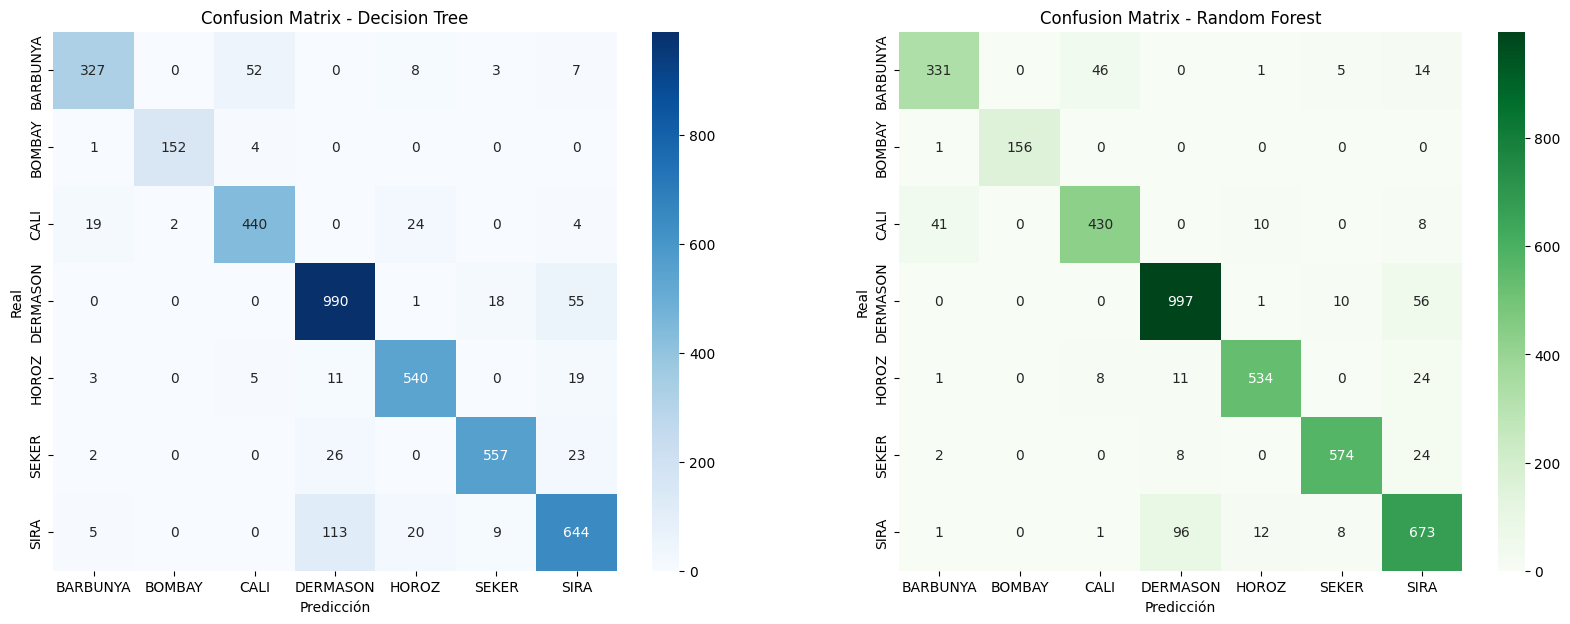

In [100]:
cm_arbol = confusion_matrix(y_test, y_pred_arbol, labels=sorted(y.unique()))
cm_forest = confusion_matrix(y_test, y_pred_forest, labels=sorted(y.unique()))

fig, axes = plt.subplots(1,2, figsize=(20,7))
sns.heatmap(cm_arbol, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')
plt.show()

In [79]:
acc_dt = accuracy_score(y_test, y_pred_arbol)
acc_rf = accuracy_score(y_test, y_pred_forest)
pt_acc = PrettyTable()
pt_acc.field_names = ['Modelo', 'Accuracy']
pt_acc.add_row(['DecisionTree', f'{acc_dt:.2f}'])
pt_acc.add_row(['RandomForest', f'{acc_rf:.2f}'])
print('Accuracy comparativo modelos:')
pt_acc

Accuracy comparativo modelos:


Modelo,Accuracy
DecisionTree,0.89
RandomForest,0.90


En vista de los valores de accuracy en los modelos, podemos concluir que el mas recomendable es random forest = 0.90

In [101]:
report_arbol = classification_report(y_test, y_pred_arbol, labels=sorted(y.unique()), output_dict=True, zero_division=0)
report_forest = classification_report(y_test, y_pred_forest, labels=sorted(y.unique()), output_dict=True, zero_division=0)

label_seker_arbol = next((lab for lab in report_arbol.keys() if lab.lower() == 'seker'), None)
label_seker_forest = next((lab for lab in report_forest.keys() if lab.lower() == 'seker'), None)

acc_seker_arbol = report_arbol[label_seker_arbol]['recall']
acc_seker_forest = report_forest[label_seker_forest]['recall']
f1_seker_arbol = report_arbol[label_seker_arbol]['f1-score']
f1_seker_forest = report_forest[label_seker_forest]['f1-score']

pt = PrettyTable()
pt.field_names = ['Modelo', 'Accuracy Seker', 'F1 Seker']
pt.add_row(['DecisionTree', f"{acc_seker_arbol:.4f}", f"{f1_seker_arbol:.4f}"])
pt.add_row(['RandomForest', f"{acc_seker_forest:.4f}", f"{f1_seker_forest:.4f}"])
pt


Modelo,Accuracy Seker,F1 Seker
DecisionTree,0.9161,0.9322
RandomForest,0.9441,0.9527


Como se puede observar random forest es el mejor modelo para la clase seker.

In [92]:
report_arbol = classification_report(y_test, y_pred_arbol, labels=sorted(y.unique()), output_dict=True, zero_division=0)
report_forest = classification_report(y_test, y_pred_forest, labels=sorted(y.unique()), output_dict=True, zero_division=0)

label_bombay_arbol = next((lab for lab in report_arbol.keys() if lab.lower() == 'bombay'), None)
label_bombay_forest = next((lab for lab in report_forest.keys() if lab.lower() == 'bombay'), None)

acc_bombay_arbol = report_arbol[label_bombay_arbol]['precision']
acc_bombay_forest = report_forest[label_bombay_forest]['precision']

pt = PrettyTable()
pt.field_names = ['Modelo', 'Prediccion Bombay']
pt.add_row(['DecisionTree', f"{acc_bombay_arbol:.2f}"])
pt.add_row(['RandomForest', f"{acc_bombay_forest:.2f}"])
pt


Modelo,Prediccion Bombay
DecisionTree,0.99
RandomForest,1.00


El mejor modelo predictivo para la clase bombay es Random Forest.

El par de clases mas confundidas por el modelo Random Forest son sira y bombay, con 96 instancias.